Build a model that can rate the sentiment of a Tweet based on its content.

You'll build an NLP model to analyze Twitter sentiment about Apple and Google products. The dataset comes from CrowdFlower via data.world. Human raters rated the sentiment in over 9,000 Tweets as positive, negative, or neither.

Aim for a Proof of Concept
There are many approaches to NLP problems - start with something simple and iterate from there. For example, you could start by limiting your analysis to positive and negative Tweets only, allowing you to build a binary classifier. Then you could add in the neutral Tweets to build out a multiclass classifier. You may also consider using some of the more advanced NLP methods in the Mod 4 Appendix.

Evaluation
Evaluating multiclass classifiers can be trickier than binary classifiers because there are multiple ways to mis-classify an observation, and some errors are more problematic than others. Use the business problem that your NLP project sets out to solve to inform your choice of evaluation metrics.

Data: https://data.world/crowdflower/brands-and-product-emotions

In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('../../data/judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
# rename columns
df = df.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'})
df.head() #Sanity Check

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
df_na_c2=df[df['Product'].isna()]
df_na_c2

,Tweet,Product,Sentiment
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [6]:
df_na_c2['Sentiment'].value_counts()

No emotion toward brand or product    5298
Positive emotion                       306
I can't tell                           147
Negative emotion                        51
Name: Sentiment, dtype: int64

In [7]:
df_nona_c2 = df[(df['Product'].isna())== False]
df_nona_c2

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [8]:
df_nona_c2['Product'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: Product, dtype: int64

In [9]:
df_nona_c2['Sentiment'].value_counts()

Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: Sentiment, dtype: int64

In [10]:
df_nona_c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 9088
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      3291 non-null   object
 1   Product    3291 non-null   object
 2   Sentiment  3291 non-null   object
dtypes: object(3)
memory usage: 102.8+ KB


In [11]:
df['Sentiment'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Sentiment, dtype: int64

- if only use data directed to products, then not enough data

In [12]:
# nltk related imports
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [13]:
# set up tokenizer
tokenizer_tweet= TweetTokenizer(strip_handles=True)
# create stemmer object
stemmer = SnowballStemmer('english')

In [14]:
stopwords_list= stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def preprocessing(text, tokenizer, stopwords_list, stemmer):
    
    text=tokenizer.tokenize(text)
    text=[word for word in text if word not in stopwords_list]
    text=[stemmer.stem(word) for word in text]
    return text

In [16]:
# set up Tweet tokenizer
from nltk.tokenize import TweetTokenizer
tokenizer_tweet= TweetTokenizer(strip_handles=True)
sample_tweet=tokenizer_tweet.tokenize(df['Tweet'][5])
sample_tweet

['New',
 'iPad',
 'Apps',
 'For',
 '#SpeechTherapy',
 'And',
 'Communication',
 'Are',
 'Showcased',
 'At',
 'The',
 '#SXSW',
 'Conference',
 'http://ht.ly/49n4M',
 '#iear',
 '#edchat',
 '#asd']

In [17]:
# take out row with null values
df=df[df['Tweet'].isna()==False]

In [18]:
# import regular expression python library
import re
# add a hashtag column
df['hashtags'] = df['Tweet'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))
df

,Tweet,Product,Sentiment,hashtags
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[#RISE_Austin, #SXSW]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,[#SXSW]
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[#iPad, #SXSW]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,[#sxsw]
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,[#SXSW]
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,[#SXSW]
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,"[#sxsw, #google, #circles]"
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,"[#sxsw, #health2dev]"
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,[#SXSW]


In [19]:
import string

In [20]:
# original code from https://github.com/srobz/Classifying-a-Tweet-s-Sentiment-Based-on-its-Content/blob/main/Phase%204%20Project%20-%201%20-%20Data%20Cleaning.ipynb
df['clean'] = df['Tweet'] 

df['clean'] = df['clean'].str.lower() #Making everything lowercase

df['clean'] = df['clean'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x)) #Removing URLs with http/s

df['clean'] = df['clean'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x)) #Removing URLs with www

df['clean'] = df['clean'].apply(lambda x: re.sub(r'{link}', '', x)) #Removing {link} from tweets

df['clean'] = df['clean'].apply(lambda x: re.sub(r"\[video\]", '', x)) #Removing [video] from tweets

df['clean'] = df['clean'].apply(lambda x: re.sub(r'&[a-z]+;', '', x)) #Removing HTML reference characters

df['clean'] = df['clean'].apply(lambda x: re.sub(r"@[A-Za-z0-9]+", '', x)) #Removing all twitter handles from tweets

df['clean'] = df['clean'].apply(lambda x: re.sub(r"[^\x00-\x7F]+\ *(?:[^\x00-\x7F]| )*", '', x)) #Removing other characters

def remove_punctuation(text): #Function to remove punctuation from tweet
    punctuationfree = "".join([i for i in text if i not in string.punctuation]) #Removing punctuation from tweet
    return punctuationfree #Returning punctuation free tweet

df['clean'] = df['clean'].apply(lambda x: remove_punctuation(x)) #Applying function to tweets

df['clean'] = df['clean'].apply(lambda x: re.sub(r"[ ]{2,}", ' ', x)) #Removing extra spaces

In [21]:
df['preprocessed_text']=df['clean'].apply(lambda x:preprocessing(x, tokenizer_tweet,stopwords_list, stemmer))

In [22]:
df

,Tweet,Product,Sentiment,hashtags,clean,preprocessed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[#RISE_Austin, #SXSW]",i have a 3g iphone after 3 hrs tweeting at ri...,"[3g, iphon, 3, hrs, tweet, riseaustin, dead, n..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,[#SXSW],know about awesome ipadiphone app that youll ...,"[know, awesom, ipadiphon, app, youll, like, ap..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[#iPad, #SXSW]",can not wait for ipad 2 also they should sale...,"[wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,[#sxsw],i hope this years festival isnt as crashy as ...,"[hope, year, festiv, isnt, crashi, year, iphon..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,[#SXSW],great stuff on fri sxsw marissa mayer google ...,"[great, stuff, fri, sxsw, marissa, mayer, goog..."
...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,[#SXSW],ipad everywhere sxsw,"[ipad, everywher, sxsw]"
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,"[#sxsw, #google, #circles]",wave buzz rt we interrupt your regularly sched...,"[wave, buzz, rt, interrupt, regular, schedul, ..."
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,"[#sxsw, #health2dev]",googles zeiger a physician never reported pote...,"[googl, zeiger, physician, never, report, pote..."
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,[#SXSW],some verizon iphone customers complained their...,"[verizon, iphon, custom, complain, time, fell,..."


In [23]:
# mapping sentiment column
df['Sentiment'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Sentiment, dtype: int64

In [24]:
# negative = 0, neutral/I can't tell = 1, positive =2 
dict_sent = {'No emotion toward brand or product':1, 
             'Positive emotion':2,
             'Negative emotion':0,
             "I can't tell": 1}
df['Sentiment'] = df['Sentiment'].map(dict_sent)

In [25]:
df['Sentiment']

0       0
1       2
2       2
3       0
4       2
       ..
9088    2
9089    1
9090    1
9091    1
9092    1
Name: Sentiment, Length: 9092, dtype: int64

In [26]:
# drop the product column because we want general sentiment to make it applicable to all tech products
df = df.drop('Product', axis=1)

In [27]:
df["preprocessed_text"] = df["preprocessed_text"].str.join(" ")

In [50]:
y = df['Sentiment']
X = df['preprocessed_text']

In [51]:
X

0       3g iphon 3 hrs tweet riseaustin dead need upgr...
1       know awesom ipadiphon app youll like appreci d...
2                              wait ipad 2 also sale sxsw
3        hope year festiv isnt crashi year iphon app sxsw
4       great stuff fri sxsw marissa mayer googl tim o...
                              ...                        
9088                                  ipad everywher sxsw
9089    wave buzz rt interrupt regular schedul sxsw ge...
9090    googl zeiger physician never report potenti ae...
9091    verizon iphon custom complain time fell back h...
9092                  rt googl test checkin offersat sxsw
Name: preprocessed_text, Length: 9092, dtype: object

In [52]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train_int, X_test, y_train_int, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_int, y_train_int, random_state=42)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tf_idf = TfidfVectorizer()


In [56]:
tf_idf.fit(X_train)

TfidfVectorizer()

In [57]:
X_train_vec=tf_idf.transform(X_train)
X_val_vec=tf_idf.transform(X_val)

In [58]:
X_train_vec

<5114x6250 sparse matrix of type '<class 'numpy.float64'>'
	with 53058 stored elements in Compressed Sparse Row format>

In [59]:
print(X_train_vec)

  (0, 5303)	0.056170204057238944
  (0, 5177)	0.3324300445578248
  (0, 4639)	0.12484881086629926
  (0, 4491)	0.45291603722411394
  (0, 3389)	0.4405209211960536
  (0, 3283)	0.34099276371780063
  (0, 3101)	0.3967239106737475
  (0, 2442)	0.12921313253278868
  (0, 2327)	0.2851383143309145
  (0, 1987)	0.3160546015547314
  (1, 5303)	0.06723746144820116
  (1, 4819)	0.5882433956185147
  (1, 2943)	0.14532366848564315
  (1, 2290)	0.5421544233860368
  (1, 2022)	0.4499764789210806
  (1, 132)	0.36320739569537486
  (2, 5810)	0.48760008755112005
  (2, 5303)	0.07414989688665263
  (2, 3316)	0.43090349333922284
  (2, 3176)	0.3839365521223976
  (2, 2963)	0.20467159851120997
  (2, 1740)	0.4409641995515605
  (2, 758)	0.43280822804213914
  (3, 6100)	0.3237062301984111
  (3, 5303)	0.06251757864181481
  :	:
  (5111, 4767)	0.42743860812669804
  (5111, 4674)	0.33865175700879974
  (5111, 4086)	0.42743860812669804
  (5111, 3003)	0.31507122133701426
  (5111, 2257)	0.23539122119143913
  (5111, 2110)	0.30725687617210

In [60]:
tfidf_train_df=pd.DataFrame(X_train_vec.toarray(), 
                              columns=tf_idf.get_feature_names())

In [71]:
tfidf_val_df = pd.DataFrame(X_val_vec.toarray(), 
                              columns=tf_idf.get_feature_names())

In [61]:
tfidf_train_df

,02,03,0310,0310appl,031111,031211,031311,031411,031511,03mzb,...,zlf,zms,zomb,zombi,zomg,zone,zoom,zuckerberg,zynga,zzzs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train

### Modeling

In [62]:
# import stuff used for modeling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [63]:
# build an evaluation function 
def evaluate(model, X_tr, y_tr, X_te, y_te):
    print('Accuracy Score:')
    print(f'Train - {accuracy_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {accuracy_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Confusion matrix for test data')
    return plot_confusion_matrix(model, X_te, y_te, include_values=True, cmap=plt.cm.Blues)

Model 1: decision tree


In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier()

In [66]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

Accuracy Score:
Train - 0.6902620258114979
Test - 0.6287390029325514
  
Confusion matrix for test data


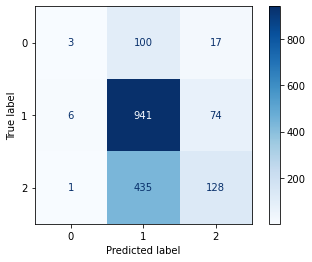

In [72]:
dt_grid_params = {'max_depth':[1,5,10], 'min_samples_split':[2,10,100]}
dt_grid = GridSearchCV(dt, dt_grid_params)
dt_output = dt_grid.fit(tfidf_train_df, y_train)
dt_output.best_params_
dt_best_model = dt_output.best_estimator_
cross_validate(dt_best_model, tfidf_train_df, y_train, return_train_score=True)
evaluate(dt_best_model, tfidf_train_df, y_train, tfidf_val_df, y_val)

Model 2: random forrest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc = RandomForestClassifier()

Accuracy Score:
Train - 0.6591709034024247
Test - 0.6199413489736071
  
Confusion matrix for test data


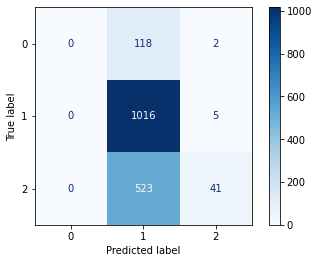

In [76]:
rfc_grid_params = {'max_depth':[1,5,10,20], 'min_samples_split':[2,10,100,500]}
rfc_grid = GridSearchCV(rfc, rfc_grid_params)
rfc_output = rfc_grid.fit(tfidf_train_df, y_train)
rfc_output.best_params_
rfc_best_model = rfc_output.best_estimator_
cross_validate(rfc_best_model, tfidf_train_df, y_train, return_train_score=True)
evaluate(rfc_best_model, tfidf_train_df, y_train, tfidf_val_df, y_val)

Model 3: naive bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB

In [80]:
nb=MultinomialNB()

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Use

Accuracy Score:
Train - 0.8136488071959327
Test - 0.644574780058651
  
Confusion matrix for test data


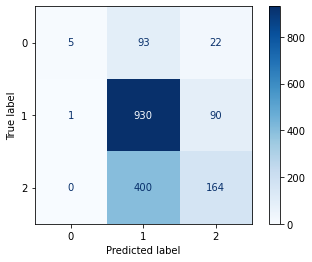

In [81]:
nb_grid_params = {'alpha':[0,0.25,0.5,1], 'fit_prior':[True,False]}
nb_grid = GridSearchCV(nb, nb_grid_params)
nb_output = nb_grid.fit(tfidf_train_df, y_train)
nb_output.best_params_
nb_best_model = nb_output.best_estimator_
cross_validate(nb_best_model, tfidf_train_df, y_train, return_train_score=True)
evaluate(nb_best_model, tfidf_train_df, y_train, tfidf_val_df, y_val)

Model 4: CatBoost

In [83]:
from catboost import CatBoostClassifier


In [84]:
cbc=CatBoostClassifier()

In [85]:
cbc.fit(tfidf_train_df, y_train)

Learning rate set to 0.085994
0:	learn: 1.0588354	total: 128ms	remaining: 2m 7s
1:	learn: 1.0249284	total: 181ms	remaining: 1m 30s
2:	learn: 0.9972595	total: 259ms	remaining: 1m 25s
3:	learn: 0.9719191	total: 310ms	remaining: 1m 17s
4:	learn: 0.9514110	total: 361ms	remaining: 1m 11s
5:	learn: 0.9325149	total: 429ms	remaining: 1m 11s
6:	learn: 0.9151079	total: 485ms	remaining: 1m 8s
7:	learn: 0.9011494	total: 533ms	remaining: 1m 6s
8:	learn: 0.8876996	total: 583ms	remaining: 1m 4s
9:	learn: 0.8766703	total: 632ms	remaining: 1m 2s
10:	learn: 0.8670651	total: 680ms	remaining: 1m 1s
11:	learn: 0.8585633	total: 732ms	remaining: 1m
12:	learn: 0.8504261	total: 783ms	remaining: 59.5s
13:	learn: 0.8432951	total: 840ms	remaining: 59.2s
14:	learn: 0.8369056	total: 930ms	remaining: 1m 1s
15:	learn: 0.8314155	total: 979ms	remaining: 1m
16:	learn: 0.8259618	total: 1.05s	remaining: 1m 1s
17:	learn: 0.8214447	total: 1.11s	remaining: 1m
18:	learn: 0.8164444	total: 1.17s	remaining: 1m
19:	learn: 0.81255

161:	learn: 0.6952725	total: 8.96s	remaining: 46.4s
162:	learn: 0.6948898	total: 9.02s	remaining: 46.3s
163:	learn: 0.6945585	total: 9.07s	remaining: 46.3s
164:	learn: 0.6943632	total: 9.12s	remaining: 46.2s
165:	learn: 0.6939615	total: 9.17s	remaining: 46.1s
166:	learn: 0.6934495	total: 9.22s	remaining: 46s
167:	learn: 0.6929265	total: 9.27s	remaining: 45.9s
168:	learn: 0.6926610	total: 9.32s	remaining: 45.8s
169:	learn: 0.6923597	total: 9.37s	remaining: 45.7s
170:	learn: 0.6917086	total: 9.41s	remaining: 45.6s
171:	learn: 0.6913512	total: 9.46s	remaining: 45.6s
172:	learn: 0.6909719	total: 9.51s	remaining: 45.5s
173:	learn: 0.6905968	total: 9.56s	remaining: 45.4s
174:	learn: 0.6901847	total: 9.61s	remaining: 45.3s
175:	learn: 0.6894236	total: 9.66s	remaining: 45.2s
176:	learn: 0.6887748	total: 9.71s	remaining: 45.2s
177:	learn: 0.6884362	total: 9.76s	remaining: 45.1s
178:	learn: 0.6881312	total: 9.81s	remaining: 45s
179:	learn: 0.6877648	total: 9.86s	remaining: 44.9s
180:	learn: 0.68

320:	learn: 0.6433963	total: 16.7s	remaining: 35.3s
321:	learn: 0.6430158	total: 16.7s	remaining: 35.3s
322:	learn: 0.6425555	total: 16.8s	remaining: 35.2s
323:	learn: 0.6421848	total: 16.8s	remaining: 35.1s
324:	learn: 0.6418835	total: 16.9s	remaining: 35.1s
325:	learn: 0.6417897	total: 16.9s	remaining: 35s
326:	learn: 0.6416316	total: 17s	remaining: 34.9s
327:	learn: 0.6414219	total: 17s	remaining: 34.9s
328:	learn: 0.6409896	total: 17.1s	remaining: 34.8s
329:	learn: 0.6408727	total: 17.1s	remaining: 34.7s
330:	learn: 0.6405068	total: 17.2s	remaining: 34.7s
331:	learn: 0.6402299	total: 17.2s	remaining: 34.6s
332:	learn: 0.6400328	total: 17.3s	remaining: 34.6s
333:	learn: 0.6394338	total: 17.3s	remaining: 34.5s
334:	learn: 0.6391961	total: 17.4s	remaining: 34.5s
335:	learn: 0.6390274	total: 17.4s	remaining: 34.4s
336:	learn: 0.6388408	total: 17.4s	remaining: 34.3s
337:	learn: 0.6386641	total: 17.5s	remaining: 34.3s
338:	learn: 0.6385076	total: 17.5s	remaining: 34.2s
339:	learn: 0.6384

481:	learn: 0.6082294	total: 24.6s	remaining: 26.4s
482:	learn: 0.6080366	total: 24.7s	remaining: 26.4s
483:	learn: 0.6078072	total: 24.7s	remaining: 26.3s
484:	learn: 0.6076765	total: 24.8s	remaining: 26.3s
485:	learn: 0.6075794	total: 24.8s	remaining: 26.2s
486:	learn: 0.6073764	total: 24.9s	remaining: 26.2s
487:	learn: 0.6072957	total: 24.9s	remaining: 26.1s
488:	learn: 0.6071168	total: 25s	remaining: 26.1s
489:	learn: 0.6069206	total: 25s	remaining: 26s
490:	learn: 0.6068215	total: 25.1s	remaining: 26s
491:	learn: 0.6066787	total: 25.1s	remaining: 25.9s
492:	learn: 0.6065339	total: 25.2s	remaining: 25.9s
493:	learn: 0.6063976	total: 25.2s	remaining: 25.8s
494:	learn: 0.6062408	total: 25.3s	remaining: 25.8s
495:	learn: 0.6061515	total: 25.3s	remaining: 25.7s
496:	learn: 0.6060293	total: 25.4s	remaining: 25.7s
497:	learn: 0.6058303	total: 25.4s	remaining: 25.6s
498:	learn: 0.6057232	total: 25.5s	remaining: 25.6s
499:	learn: 0.6055309	total: 25.5s	remaining: 25.5s
500:	learn: 0.605351

642:	learn: 0.5837683	total: 32.5s	remaining: 18.1s
643:	learn: 0.5835803	total: 32.6s	remaining: 18s
644:	learn: 0.5834808	total: 32.6s	remaining: 18s
645:	learn: 0.5833187	total: 32.7s	remaining: 17.9s
646:	learn: 0.5832566	total: 32.7s	remaining: 17.9s
647:	learn: 0.5831072	total: 32.8s	remaining: 17.8s
648:	learn: 0.5830525	total: 32.8s	remaining: 17.8s
649:	learn: 0.5829088	total: 32.9s	remaining: 17.7s
650:	learn: 0.5828131	total: 32.9s	remaining: 17.7s
651:	learn: 0.5827596	total: 33s	remaining: 17.6s
652:	learn: 0.5826258	total: 33s	remaining: 17.5s
653:	learn: 0.5824617	total: 33.1s	remaining: 17.5s
654:	learn: 0.5823786	total: 33.1s	remaining: 17.4s
655:	learn: 0.5823017	total: 33.2s	remaining: 17.4s
656:	learn: 0.5821884	total: 33.2s	remaining: 17.3s
657:	learn: 0.5819395	total: 33.3s	remaining: 17.3s
658:	learn: 0.5817942	total: 33.3s	remaining: 17.3s
659:	learn: 0.5816616	total: 33.4s	remaining: 17.2s
660:	learn: 0.5815656	total: 33.4s	remaining: 17.1s
661:	learn: 0.581472

805:	learn: 0.5640223	total: 40.5s	remaining: 9.74s
806:	learn: 0.5639328	total: 40.5s	remaining: 9.69s
807:	learn: 0.5638200	total: 40.6s	remaining: 9.64s
808:	learn: 0.5635346	total: 40.6s	remaining: 9.59s
809:	learn: 0.5633628	total: 40.7s	remaining: 9.54s
810:	learn: 0.5632596	total: 40.7s	remaining: 9.49s
811:	learn: 0.5631088	total: 40.8s	remaining: 9.44s
812:	learn: 0.5630370	total: 40.8s	remaining: 9.39s
813:	learn: 0.5629281	total: 40.9s	remaining: 9.34s
814:	learn: 0.5628131	total: 40.9s	remaining: 9.29s
815:	learn: 0.5626926	total: 41s	remaining: 9.24s
816:	learn: 0.5626259	total: 41s	remaining: 9.19s
817:	learn: 0.5625629	total: 41.1s	remaining: 9.14s
818:	learn: 0.5624257	total: 41.1s	remaining: 9.09s
819:	learn: 0.5622102	total: 41.2s	remaining: 9.04s
820:	learn: 0.5620109	total: 41.2s	remaining: 8.99s
821:	learn: 0.5616352	total: 41.3s	remaining: 8.94s
822:	learn: 0.5615659	total: 41.3s	remaining: 8.88s
823:	learn: 0.5614692	total: 41.4s	remaining: 8.84s
824:	learn: 0.56

966:	learn: 0.5456866	total: 48.3s	remaining: 1.65s
967:	learn: 0.5456242	total: 48.3s	remaining: 1.6s
968:	learn: 0.5455597	total: 48.4s	remaining: 1.55s
969:	learn: 0.5454207	total: 48.4s	remaining: 1.5s
970:	learn: 0.5453515	total: 48.4s	remaining: 1.45s
971:	learn: 0.5452937	total: 48.5s	remaining: 1.4s
972:	learn: 0.5452240	total: 48.5s	remaining: 1.35s
973:	learn: 0.5451258	total: 48.6s	remaining: 1.3s
974:	learn: 0.5450881	total: 48.6s	remaining: 1.25s
975:	learn: 0.5448052	total: 48.7s	remaining: 1.2s
976:	learn: 0.5447518	total: 48.7s	remaining: 1.15s
977:	learn: 0.5445947	total: 48.8s	remaining: 1.1s
978:	learn: 0.5445163	total: 48.8s	remaining: 1.05s
979:	learn: 0.5444656	total: 48.9s	remaining: 997ms
980:	learn: 0.5443586	total: 48.9s	remaining: 947ms
981:	learn: 0.5442551	total: 49s	remaining: 897ms
982:	learn: 0.5441207	total: 49s	remaining: 847ms
983:	learn: 0.5440058	total: 49s	remaining: 798ms
984:	learn: 0.5436595	total: 49.1s	remaining: 748ms
985:	learn: 0.5435690	to

Accuracy Score:
Train - 0.7841220179898318
Test - 0.6645161290322581
  
Confusion matrix for test data


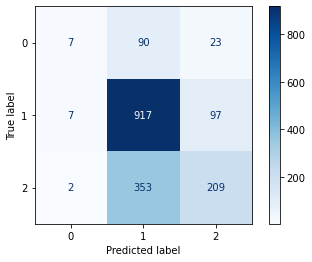

In [86]:
evaluate(cbc,tfidf_train_df,y_train,tfidf_val_df,y_val)

Learning rate set to 0.085994
0:	learn: 1.0588354	total: 67.9ms	remaining: 1m 7s
1:	learn: 1.0249284	total: 116ms	remaining: 58s
2:	learn: 0.9972595	total: 165ms	remaining: 54.7s
3:	learn: 0.9719191	total: 213ms	remaining: 53.1s
4:	learn: 0.9514110	total: 260ms	remaining: 51.8s
5:	learn: 0.9325149	total: 308ms	remaining: 50.9s
6:	learn: 0.9151079	total: 356ms	remaining: 50.5s
7:	learn: 0.9011494	total: 400ms	remaining: 49.7s
8:	learn: 0.8876996	total: 451ms	remaining: 49.6s
9:	learn: 0.8766703	total: 521ms	remaining: 51.5s
10:	learn: 0.8670651	total: 579ms	remaining: 52s
11:	learn: 0.8585633	total: 630ms	remaining: 51.9s
12:	learn: 0.8504261	total: 683ms	remaining: 51.8s
13:	learn: 0.8432951	total: 738ms	remaining: 52s
14:	learn: 0.8369056	total: 789ms	remaining: 51.8s
15:	learn: 0.8314155	total: 838ms	remaining: 51.5s
16:	learn: 0.8259618	total: 888ms	remaining: 51.4s
17:	learn: 0.8214447	total: 943ms	remaining: 51.4s
18:	learn: 0.8164444	total: 989ms	remaining: 51.1s
19:	learn: 0.812

164:	learn: 0.6943632	total: 8.76s	remaining: 44.3s
165:	learn: 0.6939615	total: 8.8s	remaining: 44.2s
166:	learn: 0.6934495	total: 8.86s	remaining: 44.2s
167:	learn: 0.6929265	total: 8.91s	remaining: 44.1s
168:	learn: 0.6926610	total: 8.95s	remaining: 44s
169:	learn: 0.6923597	total: 9s	remaining: 43.9s
170:	learn: 0.6917086	total: 9.04s	remaining: 43.8s
171:	learn: 0.6913512	total: 9.09s	remaining: 43.8s
172:	learn: 0.6909719	total: 9.14s	remaining: 43.7s
173:	learn: 0.6905968	total: 9.19s	remaining: 43.6s
174:	learn: 0.6901847	total: 9.23s	remaining: 43.5s
175:	learn: 0.6894236	total: 9.28s	remaining: 43.5s
176:	learn: 0.6887748	total: 9.33s	remaining: 43.4s
177:	learn: 0.6884362	total: 9.38s	remaining: 43.3s
178:	learn: 0.6881312	total: 9.42s	remaining: 43.2s
179:	learn: 0.6877648	total: 9.47s	remaining: 43.1s
180:	learn: 0.6873003	total: 9.53s	remaining: 43.1s
181:	learn: 0.6869013	total: 9.58s	remaining: 43s
182:	learn: 0.6864496	total: 9.62s	remaining: 43s
183:	learn: 0.6861623	

324:	learn: 0.6418835	total: 16.9s	remaining: 35.1s
325:	learn: 0.6417897	total: 16.9s	remaining: 35s
326:	learn: 0.6416316	total: 17s	remaining: 34.9s
327:	learn: 0.6414219	total: 17s	remaining: 34.9s
328:	learn: 0.6409896	total: 17.1s	remaining: 34.8s
329:	learn: 0.6408727	total: 17.1s	remaining: 34.7s
330:	learn: 0.6405068	total: 17.2s	remaining: 34.7s
331:	learn: 0.6402299	total: 17.2s	remaining: 34.6s
332:	learn: 0.6400328	total: 17.3s	remaining: 34.6s
333:	learn: 0.6394338	total: 17.3s	remaining: 34.5s
334:	learn: 0.6391961	total: 17.3s	remaining: 34.4s
335:	learn: 0.6390274	total: 17.4s	remaining: 34.4s
336:	learn: 0.6388408	total: 17.4s	remaining: 34.3s
337:	learn: 0.6386641	total: 17.5s	remaining: 34.2s
338:	learn: 0.6385076	total: 17.5s	remaining: 34.2s
339:	learn: 0.6384031	total: 17.6s	remaining: 34.1s
340:	learn: 0.6382380	total: 17.6s	remaining: 34.1s
341:	learn: 0.6378301	total: 17.7s	remaining: 34s
342:	learn: 0.6376879	total: 17.7s	remaining: 33.9s
343:	learn: 0.637428

483:	learn: 0.6078072	total: 24.4s	remaining: 26s
484:	learn: 0.6076765	total: 24.4s	remaining: 25.9s
485:	learn: 0.6075794	total: 24.4s	remaining: 25.9s
486:	learn: 0.6073764	total: 24.5s	remaining: 25.8s
487:	learn: 0.6072957	total: 24.5s	remaining: 25.7s
488:	learn: 0.6071168	total: 24.6s	remaining: 25.7s
489:	learn: 0.6069206	total: 24.6s	remaining: 25.6s
490:	learn: 0.6068215	total: 24.7s	remaining: 25.6s
491:	learn: 0.6066787	total: 24.7s	remaining: 25.5s
492:	learn: 0.6065339	total: 24.8s	remaining: 25.5s
493:	learn: 0.6063976	total: 24.8s	remaining: 25.4s
494:	learn: 0.6062408	total: 24.9s	remaining: 25.4s
495:	learn: 0.6061515	total: 24.9s	remaining: 25.3s
496:	learn: 0.6060293	total: 25s	remaining: 25.3s
497:	learn: 0.6058303	total: 25s	remaining: 25.2s
498:	learn: 0.6057232	total: 25.1s	remaining: 25.2s
499:	learn: 0.6055309	total: 25.1s	remaining: 25.1s
500:	learn: 0.6053516	total: 25.2s	remaining: 25.1s
501:	learn: 0.6052247	total: 25.2s	remaining: 25s
502:	learn: 0.605064

643:	learn: 0.5835803	total: 31.8s	remaining: 17.6s
644:	learn: 0.5834808	total: 31.9s	remaining: 17.5s
645:	learn: 0.5833187	total: 31.9s	remaining: 17.5s
646:	learn: 0.5832566	total: 32s	remaining: 17.4s
647:	learn: 0.5831072	total: 32s	remaining: 17.4s
648:	learn: 0.5830525	total: 32s	remaining: 17.3s
649:	learn: 0.5829088	total: 32.1s	remaining: 17.3s
650:	learn: 0.5828131	total: 32.1s	remaining: 17.2s
651:	learn: 0.5827596	total: 32.2s	remaining: 17.2s
652:	learn: 0.5826258	total: 32.2s	remaining: 17.1s
653:	learn: 0.5824617	total: 32.3s	remaining: 17.1s
654:	learn: 0.5823786	total: 32.3s	remaining: 17s
655:	learn: 0.5823017	total: 32.4s	remaining: 17s
656:	learn: 0.5821884	total: 32.4s	remaining: 16.9s
657:	learn: 0.5819395	total: 32.5s	remaining: 16.9s
658:	learn: 0.5817942	total: 32.5s	remaining: 16.8s
659:	learn: 0.5816616	total: 32.6s	remaining: 16.8s
660:	learn: 0.5815656	total: 32.6s	remaining: 16.7s
661:	learn: 0.5814720	total: 32.7s	remaining: 16.7s
662:	learn: 0.5813581	

803:	learn: 0.5642156	total: 39.3s	remaining: 9.58s
804:	learn: 0.5640766	total: 39.3s	remaining: 9.53s
805:	learn: 0.5640223	total: 39.4s	remaining: 9.48s
806:	learn: 0.5639328	total: 39.4s	remaining: 9.43s
807:	learn: 0.5638200	total: 39.5s	remaining: 9.38s
808:	learn: 0.5635346	total: 39.5s	remaining: 9.34s
809:	learn: 0.5633628	total: 39.6s	remaining: 9.29s
810:	learn: 0.5632596	total: 39.6s	remaining: 9.24s
811:	learn: 0.5631088	total: 39.7s	remaining: 9.19s
812:	learn: 0.5630370	total: 39.8s	remaining: 9.14s
813:	learn: 0.5629281	total: 39.8s	remaining: 9.09s
814:	learn: 0.5628131	total: 39.8s	remaining: 9.04s
815:	learn: 0.5626926	total: 39.9s	remaining: 9s
816:	learn: 0.5626259	total: 39.9s	remaining: 8.95s
817:	learn: 0.5625629	total: 40s	remaining: 8.9s
818:	learn: 0.5624257	total: 40s	remaining: 8.85s
819:	learn: 0.5622102	total: 40.1s	remaining: 8.8s
820:	learn: 0.5620109	total: 40.1s	remaining: 8.75s
821:	learn: 0.5616352	total: 40.2s	remaining: 8.7s
822:	learn: 0.5615659	

965:	learn: 0.5458319	total: 47.1s	remaining: 1.66s
966:	learn: 0.5456866	total: 47.1s	remaining: 1.61s
967:	learn: 0.5456242	total: 47.2s	remaining: 1.56s
968:	learn: 0.5455597	total: 47.2s	remaining: 1.51s
969:	learn: 0.5454207	total: 47.3s	remaining: 1.46s
970:	learn: 0.5453515	total: 47.3s	remaining: 1.41s
971:	learn: 0.5452937	total: 47.4s	remaining: 1.36s
972:	learn: 0.5452240	total: 47.4s	remaining: 1.32s
973:	learn: 0.5451258	total: 47.5s	remaining: 1.27s
974:	learn: 0.5450881	total: 47.5s	remaining: 1.22s
975:	learn: 0.5448052	total: 47.6s	remaining: 1.17s
976:	learn: 0.5447518	total: 47.6s	remaining: 1.12s
977:	learn: 0.5445947	total: 47.7s	remaining: 1.07s
978:	learn: 0.5445163	total: 47.8s	remaining: 1.02s
979:	learn: 0.5444656	total: 47.8s	remaining: 976ms
980:	learn: 0.5443586	total: 47.9s	remaining: 927ms
981:	learn: 0.5442551	total: 47.9s	remaining: 878ms
982:	learn: 0.5441207	total: 47.9s	remaining: 829ms
983:	learn: 0.5440058	total: 48s	remaining: 780ms
984:	learn: 0.

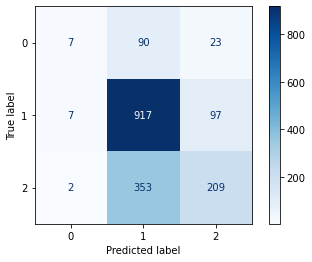

In [89]:
cbc_iter=CatBoostClassifier(od_type='Iter')
cbc_iter.fit(tfidf_train_df,y_train)
evaluate(cbc_iter,tfidf_train_df,y_train,tfidf_val_df,y_val)

Learning rate set to 0.085994
0:	learn: 1.0588354	total: 68.5ms	remaining: 1m 8s
1:	learn: 1.0249284	total: 121ms	remaining: 1m
2:	learn: 0.9972595	total: 175ms	remaining: 58.2s
3:	learn: 0.9719191	total: 229ms	remaining: 56.9s
4:	learn: 0.9514110	total: 282ms	remaining: 56.2s
5:	learn: 0.9325149	total: 331ms	remaining: 54.8s
6:	learn: 0.9151079	total: 379ms	remaining: 53.7s
7:	learn: 0.9011494	total: 426ms	remaining: 52.8s
8:	learn: 0.8876996	total: 476ms	remaining: 52.4s
9:	learn: 0.8766703	total: 531ms	remaining: 52.6s
10:	learn: 0.8670651	total: 580ms	remaining: 52.1s
11:	learn: 0.8585633	total: 628ms	remaining: 51.7s
12:	learn: 0.8504261	total: 676ms	remaining: 51.3s
13:	learn: 0.8432951	total: 725ms	remaining: 51.1s
14:	learn: 0.8369056	total: 773ms	remaining: 50.8s
15:	learn: 0.8314155	total: 820ms	remaining: 50.4s
16:	learn: 0.8259618	total: 872ms	remaining: 50.4s
17:	learn: 0.8214447	total: 919ms	remaining: 50.1s
18:	learn: 0.8164444	total: 967ms	remaining: 49.9s
19:	learn: 0.

162:	learn: 0.6948898	total: 7.88s	remaining: 40.5s
163:	learn: 0.6945585	total: 7.92s	remaining: 40.4s
164:	learn: 0.6943632	total: 7.97s	remaining: 40.3s
165:	learn: 0.6939615	total: 8.02s	remaining: 40.3s
166:	learn: 0.6934495	total: 8.07s	remaining: 40.3s
167:	learn: 0.6929265	total: 8.12s	remaining: 40.2s
168:	learn: 0.6926610	total: 8.16s	remaining: 40.1s
169:	learn: 0.6923597	total: 8.21s	remaining: 40.1s
170:	learn: 0.6917086	total: 8.26s	remaining: 40s
171:	learn: 0.6913512	total: 8.3s	remaining: 40s
172:	learn: 0.6909719	total: 8.35s	remaining: 39.9s
173:	learn: 0.6905968	total: 8.41s	remaining: 39.9s
174:	learn: 0.6901847	total: 8.46s	remaining: 39.9s
175:	learn: 0.6894236	total: 8.52s	remaining: 39.9s
176:	learn: 0.6887748	total: 8.57s	remaining: 39.9s
177:	learn: 0.6884362	total: 8.63s	remaining: 39.9s
178:	learn: 0.6881312	total: 8.68s	remaining: 39.8s
179:	learn: 0.6877648	total: 8.73s	remaining: 39.8s
180:	learn: 0.6873003	total: 8.77s	remaining: 39.7s
181:	learn: 0.686

325:	learn: 0.6417897	total: 15.6s	remaining: 32.3s
326:	learn: 0.6416316	total: 15.7s	remaining: 32.3s
327:	learn: 0.6414219	total: 15.7s	remaining: 32.2s
328:	learn: 0.6409896	total: 15.8s	remaining: 32.2s
329:	learn: 0.6408727	total: 15.8s	remaining: 32.1s
330:	learn: 0.6405068	total: 15.9s	remaining: 32.1s
331:	learn: 0.6402299	total: 15.9s	remaining: 32s
332:	learn: 0.6400328	total: 16s	remaining: 32s
333:	learn: 0.6394338	total: 16s	remaining: 31.9s
334:	learn: 0.6391961	total: 16.1s	remaining: 31.9s
335:	learn: 0.6390274	total: 16.1s	remaining: 31.8s
336:	learn: 0.6388408	total: 16.2s	remaining: 31.8s
337:	learn: 0.6386641	total: 16.2s	remaining: 31.7s
338:	learn: 0.6385076	total: 16.2s	remaining: 31.7s
339:	learn: 0.6384031	total: 16.3s	remaining: 31.6s
340:	learn: 0.6382380	total: 16.3s	remaining: 31.6s
341:	learn: 0.6378301	total: 16.4s	remaining: 31.5s
342:	learn: 0.6376879	total: 16.4s	remaining: 31.5s
343:	learn: 0.6374287	total: 16.5s	remaining: 31.4s
344:	learn: 0.637198

487:	learn: 0.6072957	total: 23.8s	remaining: 25s
488:	learn: 0.6071168	total: 23.8s	remaining: 24.9s
489:	learn: 0.6069206	total: 23.9s	remaining: 24.9s
490:	learn: 0.6068215	total: 23.9s	remaining: 24.8s
491:	learn: 0.6066787	total: 24s	remaining: 24.8s
492:	learn: 0.6065339	total: 24.1s	remaining: 24.7s
493:	learn: 0.6063976	total: 24.1s	remaining: 24.7s
494:	learn: 0.6062408	total: 24.2s	remaining: 24.6s
495:	learn: 0.6061515	total: 24.2s	remaining: 24.6s
496:	learn: 0.6060293	total: 24.3s	remaining: 24.5s
497:	learn: 0.6058303	total: 24.3s	remaining: 24.5s
498:	learn: 0.6057232	total: 24.3s	remaining: 24.4s
499:	learn: 0.6055309	total: 24.4s	remaining: 24.4s
500:	learn: 0.6053516	total: 24.4s	remaining: 24.3s
501:	learn: 0.6052247	total: 24.5s	remaining: 24.3s
502:	learn: 0.6050643	total: 24.5s	remaining: 24.2s
503:	learn: 0.6048776	total: 24.6s	remaining: 24.2s
504:	learn: 0.6046077	total: 24.6s	remaining: 24.1s
505:	learn: 0.6041407	total: 24.7s	remaining: 24.1s
506:	learn: 0.60

646:	learn: 0.5832566	total: 31.4s	remaining: 17.1s
647:	learn: 0.5831072	total: 31.4s	remaining: 17.1s
648:	learn: 0.5830525	total: 31.5s	remaining: 17s
649:	learn: 0.5829088	total: 31.5s	remaining: 17s
650:	learn: 0.5828131	total: 31.6s	remaining: 16.9s
651:	learn: 0.5827596	total: 31.6s	remaining: 16.9s
652:	learn: 0.5826258	total: 31.7s	remaining: 16.8s
653:	learn: 0.5824617	total: 31.7s	remaining: 16.8s
654:	learn: 0.5823786	total: 31.8s	remaining: 16.7s
655:	learn: 0.5823017	total: 31.8s	remaining: 16.7s
656:	learn: 0.5821884	total: 31.9s	remaining: 16.6s
657:	learn: 0.5819395	total: 31.9s	remaining: 16.6s
658:	learn: 0.5817942	total: 31.9s	remaining: 16.5s
659:	learn: 0.5816616	total: 32s	remaining: 16.5s
660:	learn: 0.5815656	total: 32s	remaining: 16.4s
661:	learn: 0.5814720	total: 32.1s	remaining: 16.4s
662:	learn: 0.5813581	total: 32.1s	remaining: 16.3s
663:	learn: 0.5812690	total: 32.2s	remaining: 16.3s
664:	learn: 0.5811291	total: 32.2s	remaining: 16.2s
665:	learn: 0.581033

805:	learn: 0.5640223	total: 38.8s	remaining: 9.33s
806:	learn: 0.5639328	total: 38.8s	remaining: 9.29s
807:	learn: 0.5638200	total: 38.9s	remaining: 9.24s
808:	learn: 0.5635346	total: 38.9s	remaining: 9.19s
809:	learn: 0.5633628	total: 39s	remaining: 9.14s
810:	learn: 0.5632596	total: 39s	remaining: 9.09s
811:	learn: 0.5631088	total: 39.1s	remaining: 9.04s
812:	learn: 0.5630370	total: 39.1s	remaining: 8.99s
813:	learn: 0.5629281	total: 39.1s	remaining: 8.95s
814:	learn: 0.5628131	total: 39.2s	remaining: 8.9s
815:	learn: 0.5626926	total: 39.2s	remaining: 8.85s
816:	learn: 0.5626259	total: 39.3s	remaining: 8.8s
817:	learn: 0.5625629	total: 39.3s	remaining: 8.75s
818:	learn: 0.5624257	total: 39.4s	remaining: 8.7s
819:	learn: 0.5622102	total: 39.4s	remaining: 8.65s
820:	learn: 0.5620109	total: 39.5s	remaining: 8.6s
821:	learn: 0.5616352	total: 39.5s	remaining: 8.56s
822:	learn: 0.5615659	total: 39.6s	remaining: 8.51s
823:	learn: 0.5614692	total: 39.6s	remaining: 8.46s
824:	learn: 0.561384

965:	learn: 0.5458319	total: 46.2s	remaining: 1.63s
966:	learn: 0.5456866	total: 46.3s	remaining: 1.58s
967:	learn: 0.5456242	total: 46.3s	remaining: 1.53s
968:	learn: 0.5455597	total: 46.4s	remaining: 1.48s
969:	learn: 0.5454207	total: 46.4s	remaining: 1.44s
970:	learn: 0.5453515	total: 46.5s	remaining: 1.39s
971:	learn: 0.5452937	total: 46.5s	remaining: 1.34s
972:	learn: 0.5452240	total: 46.6s	remaining: 1.29s
973:	learn: 0.5451258	total: 46.6s	remaining: 1.24s
974:	learn: 0.5450881	total: 46.7s	remaining: 1.2s
975:	learn: 0.5448052	total: 46.7s	remaining: 1.15s
976:	learn: 0.5447518	total: 46.8s	remaining: 1.1s
977:	learn: 0.5445947	total: 46.8s	remaining: 1.05s
978:	learn: 0.5445163	total: 46.9s	remaining: 1s
979:	learn: 0.5444656	total: 46.9s	remaining: 957ms
980:	learn: 0.5443586	total: 47s	remaining: 909ms
981:	learn: 0.5442551	total: 47s	remaining: 862ms
982:	learn: 0.5441207	total: 47s	remaining: 814ms
983:	learn: 0.5440058	total: 47.1s	remaining: 766ms
984:	learn: 0.5436595	t

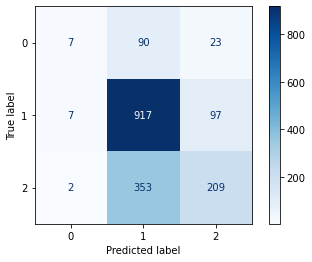

In [90]:
cbc_itd=CatBoostClassifier(od_type='IncToDec')
cbc_itd.fit(tfidf_train_df,y_train)
evaluate(cbc_itd,tfidf_train_df,y_train,tfidf_val_df,y_val)